# Outliers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("bigmart.csv")

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Univariate outliers

Univariate outliers are data points that deviate significantly from the rest of the data in a single variable. They can be detected using statistical methods based solely on the distribution of that variable.

Detection Methods:

Z-Score: 
IQR Method: 
Visualization: Use boxplots or histograms to visually identify outliers.

### Bivariate outliers

Bivariate outliers are data points that deviate significantly from the expected relationship between two variables. These outliers are detected by examining the joint distribution of the two variables.

Detection Methods:

Scatter Plots: Visual inspection of scatter plots to identify points that do not fit the overall pattern.
Mahalanobis Distance: A multivariate measure that accounts for correlations between variables to detect outliers.
Regression Analysis: Identify points with large residuals after fitting a regression model.

#  Univariate outliers

> about boxplot

A boxplot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It can also highlight outliers in the data.

Key components of a boxplot:
1. **Box**: The main part of the plot, which shows the interquartile range (IQR). The bottom of the box represents Q1, and the top of the box represents Q3.
2. **Median Line**: A line inside the box that shows the median (Q2) of the data.
3. **Whiskers**: Lines that extend from the box to the smallest and largest values within 1.5 * IQR from Q1 and Q3, respectively.
4. **Outliers**: Data points that fall outside the range of the whiskers. These are often plotted as individual points.

Boxplots are useful for identifying outliers and understanding the spread and skewness of the data. They are particularly helpful when comparing distributions across multiple groups.

### Identifying univariate outliers

This code sets the default figure size for matplotlib plots to a width of 16 inches and a height of 4 inches.

plt.rcParams: This is a dictionary-like object in Matplotlib that contains default parameters for various properties of plots. You can use it to customize the default appearance of plots.


"figure.figsize": This key in rcParams specifies the default size of the figure in inches. It expects a tuple with two values: (width, height).


(16, 4): This tuple sets the width of the figure to 16 inches and the height to 4 inches.

In [ ]:
plt.rcParams["figure.figsize"] = (16,4)

plt.subplot: This function is used to add a subplot to a figure. It divides the figure into a grid and specifies the location of the subplot within that grid.

Arguments (1, 4, 1):

1: The number of rows in the grid of subplots.
4: The number of columns in the grid of subplots.
1: The index of the subplot. The subplots are numbered from left to right, top to bottom.

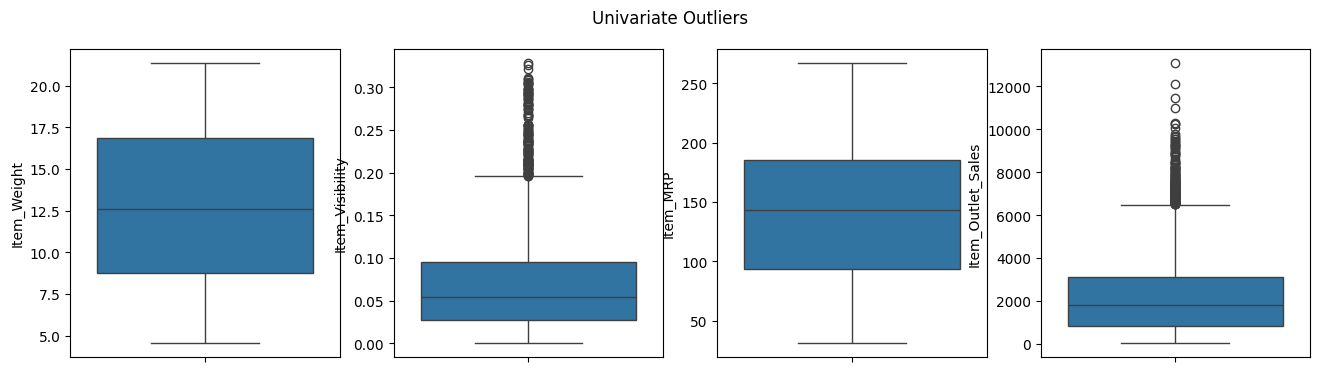

In [ ]:
plt.subplot(1,4,1)
sns.boxplot(data["Item_Weight"])

plt.subplot(1,4,2)
sns.boxplot(data["Item_Visibility"])

plt.subplot(1,4,3)
sns.boxplot(data["Item_MRP"])

plt.subplot(1,4,4)
sns.boxplot(data["Item_Outlet_Sales"])

plt.suptitle("Univariate Outliers")
plt.show()

delete the outliers item_Outlet_sales because it having high range difference (6k-12k)

but in Item_Visibility we see small ranging (0.2-0.3) dont delete it use another method

### Bivariate outliers

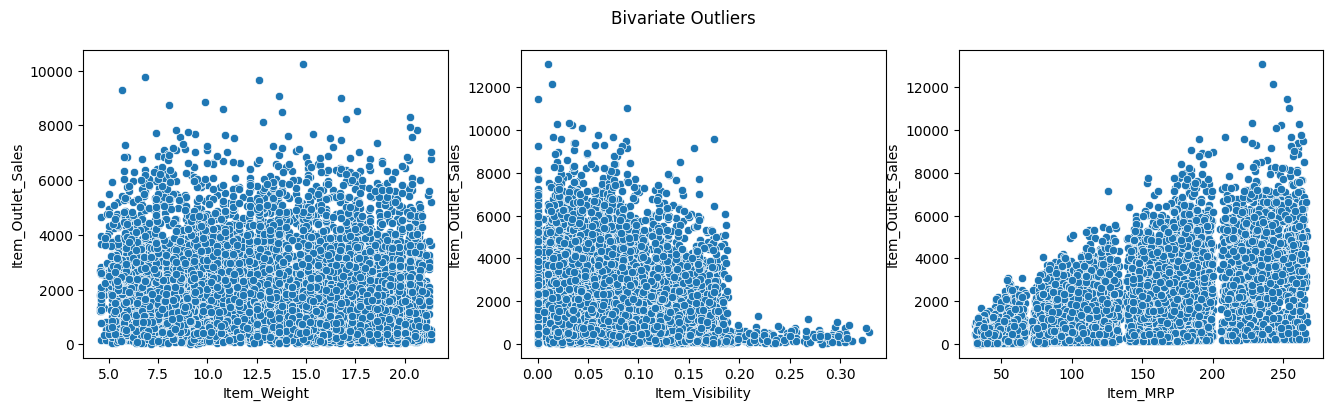

In [ ]:
plt.subplot(1,3,1)
sns.scatterplot(y=data["Item_Outlet_Sales"], x=data["Item_Weight"])

plt.subplot(1,3,2)
sns.scatterplot(y=data["Item_Outlet_Sales"], x=data["Item_Visibility"])

plt.subplot(1,3,3)
sns.scatterplot(y=data["Item_Outlet_Sales"], x=data["Item_MRP"])

plt.suptitle("Bivariate Outliers")
plt.show()

for univariate

from 7k - 10k  very large number of vales but few numbers are >10k

so we should leave the outliers b/w 7k and 10k

cap the outliers above 10k

In [ ]:
# Capping the outliers in the column Item_Outlet_Sales having values greater than 10k
data["Item_Outlet_Sales"].values[data["Item_Outlet_Sales"]>10000] = 10000

In [ ]:
data[data["Item_Outlet_Sales"]>10000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


for bivariate

delete the outliers above 8k 

In [ ]:
data = data[~(data["Item_Outlet_Sales"]>8000)]

In [ ]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


> why we capped for univariate outliers and deleted for bivariate outliers

The decision to cap univariate outliers and delete bivariate outliers is based on different considerations for each type of outlier:

1. **Univariate Outliers:**
   - **Capping:** In the case of univariate outliers, we capped the values above 10,000 for `Item_Outlet_Sales`. This approach is often used when the outliers are not extreme enough to warrant complete removal but could still skew the analysis. Capping helps to reduce the impact of these outliers without losing data points entirely. It is a way to handle outliers that are within a reasonable range but still higher than the typical values.

2. **Bivariate Outliers:**
   - **Deleting:** For bivariate outliers, we deleted the values above 8,000 for `Item_Outlet_Sales`. This approach is taken when the outliers significantly deviate from the expected relationship between two variables. These outliers can distort the analysis of the relationship between the variables. By removing them, we ensure that the analysis reflects the true relationship without being skewed by extreme values.

In summary, capping is used to mitigate the effect of moderate univariate outliers, while deleting is used to remove extreme bivariate outliers that could distort the analysis of relationships between variables.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=735df63f-eaf2-46ab-a8a5-7617b63b3308' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>